Submitted By: Sijal Shrestha, C0910639. Link to Github Repo with Models and Dataset: https://github.com/CleverGirl1/AlgerianForestFire

Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

In [2]:

data = pd.read_csv('../Dataset/Algerian_forest_fires_cleaned.csv')
print(data.head())
print(data.isnull().sum())


   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


 Data Cleaning and Feature Selection

In [3]:
# Dropping any irrelevant columns, such as 'Region', if it's not useful for the model
from sklearn.preprocessing import LabelEncoder
if 'Region' in data.columns:
    data = data.drop(['Region'], axis=1)

data = data.dropna()

# Encode the 'Classes' column as it contains categorical data
label_encoder = LabelEncoder()
data['Classes'] = label_encoder.fit_transform(data['Classes'])

# Verify all columns are now numeric
print("\nData types after encoding:\n", data.dtypes)

# Separate features (X) and the target variable (y)
X = data.drop('FWI', axis=1)
y = data['FWI']



Data types after encoding:
 day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
dtype: object


Exploratory Data Analysis (EDA) and Visualization. Larger Visualizations will be left as comment for faster build time.

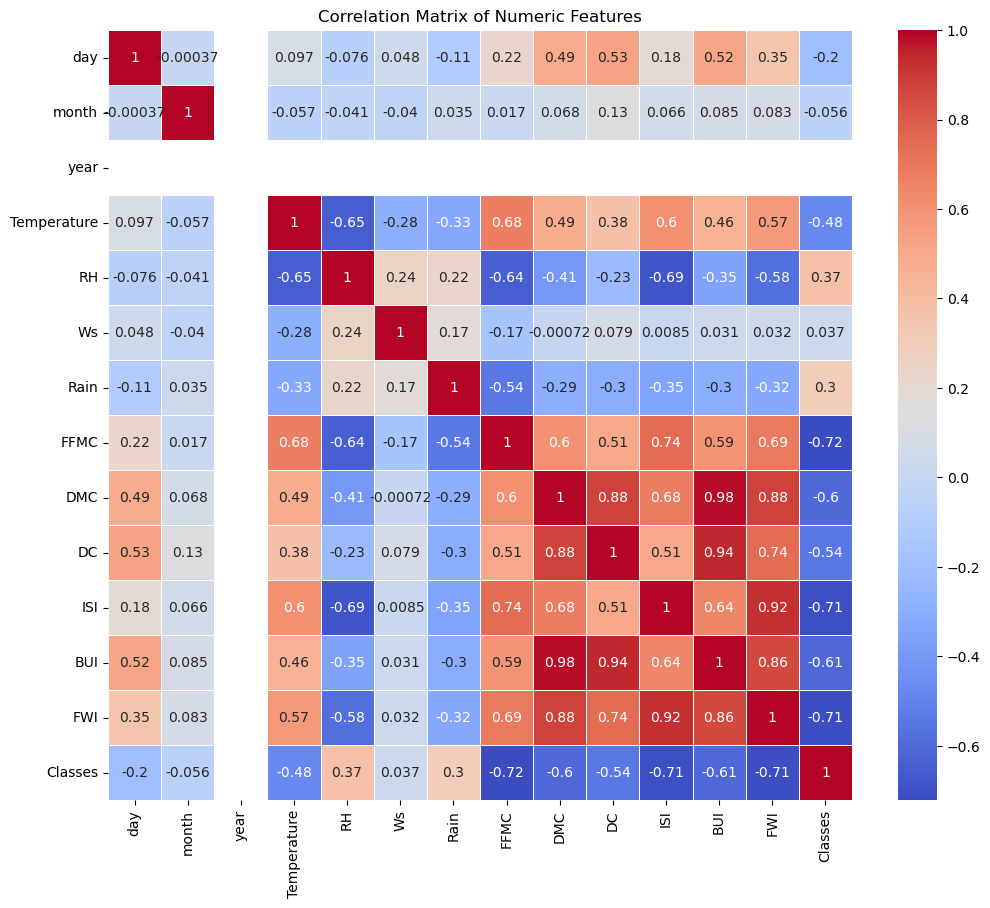

In [4]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Visualize the correlation matrix to identify relationships between numeric variables
plt.figure(figsize=(12,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


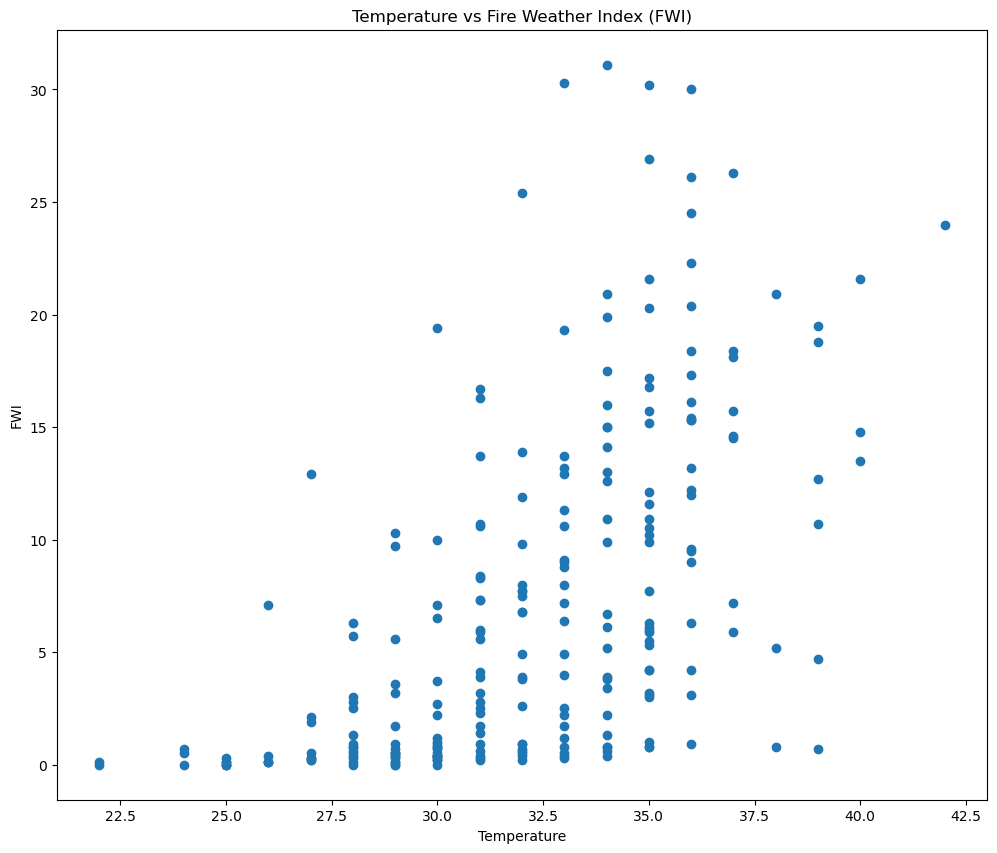

In [5]:
# Scatter plot example: Temperature vs FWI
plt.figure(figsize=(12,10))
plt.scatter(data['Temperature'], data['FWI'])
plt.title("Temperature vs Fire Weather Index (FWI)")
plt.xlabel("Temperature")
plt.ylabel("FWI")
plt.show()


In [6]:
# Pairplot to explore relationships between different features
#sns.pairplot(data)
#plt.show()

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (194, 13), Testing data shape: (49, 13)


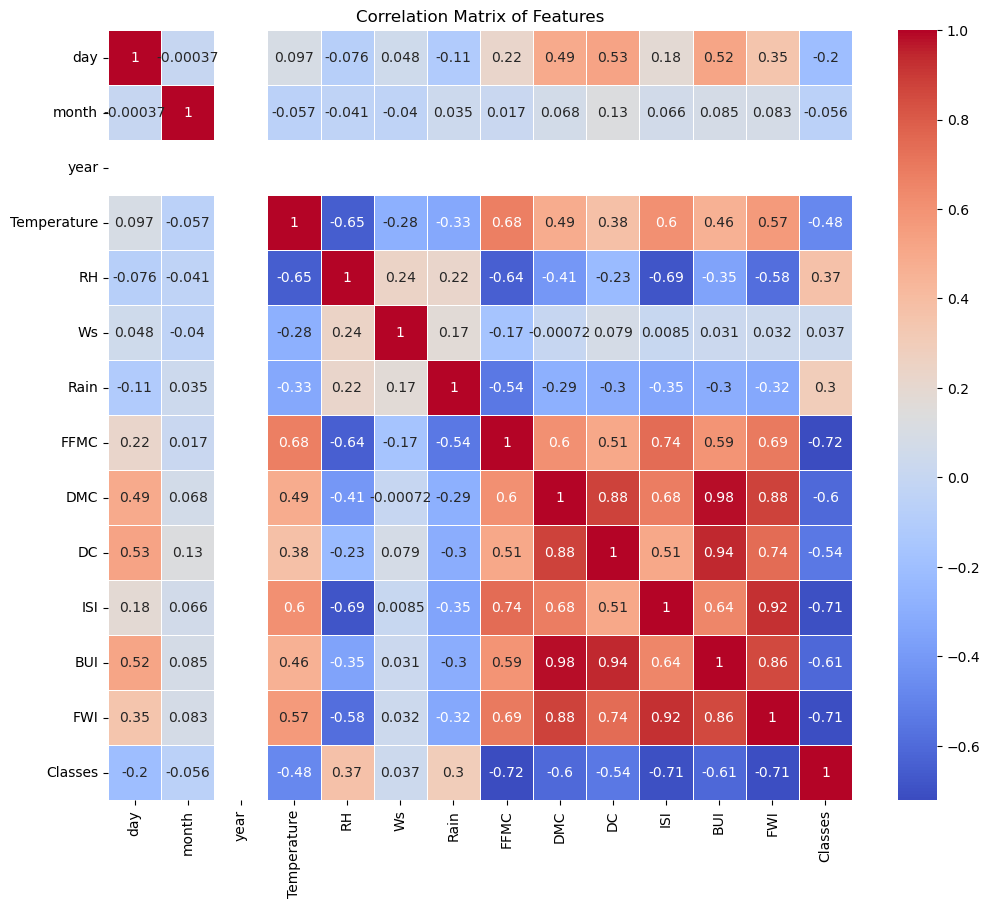

In [8]:
# Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

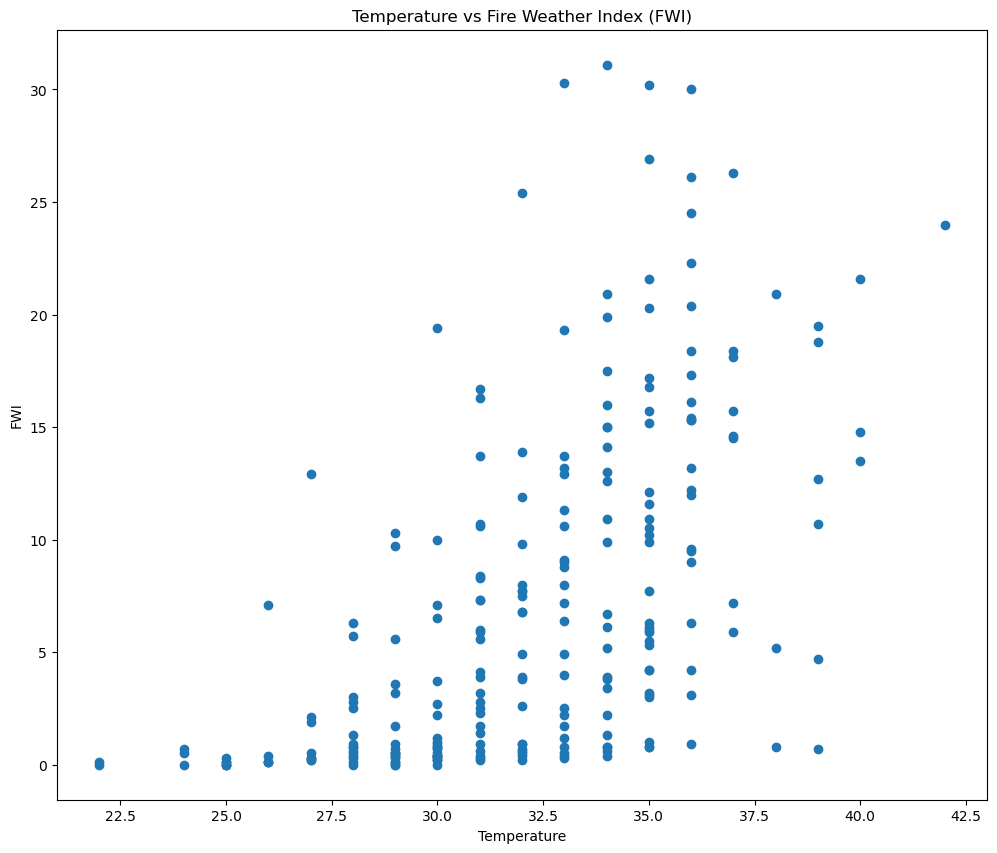

In [9]:
# Scatter plot: Temperature vs Fire Weather Index (FWI)
plt.figure(figsize=(12, 10))
plt.scatter(data['Temperature'], data['FWI'])
plt.title("Temperature vs Fire Weather Index (FWI)")
plt.xlabel("Temperature")
plt.ylabel("FWI")
plt.show()

In [10]:
# Pairplot to explore relationships between different features, Left as comment for faster compiling time.
#sns.pairplot(data)
#plt.show()

Model 1: Multiple Linear Regression

In [11]:
# Initialize and train the Linear Regression model
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
# Output results
print("\nLinear Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Linear Regression Results:
Mean Squared Error: 0.34313882761452946
R-squared: 0.988678432899717


Model 2: Polynomial Regression

In [12]:
# Apply polynomial features (degree 2) to capture non-linear relationships
from sklearn.metrics import mean_absolute_error
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train a polynomial regression model
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)

# Make predictions with the polynomial regression model
y_poly_pred = poly_regressor.predict(X_poly_test)

# Evaluate the polynomial regression model
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)
mae_poly= mean_absolute_error(y_test, y_poly_pred)
print(f"Polynomial Regression - Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression - Mean Absolute Error: {mae_poly}")
print(f"Polynomial Regression - R^2 Score: {r2_poly}")


Polynomial Regression - Mean Squared Error: 0.32119243638378614
Polynomial Regression - Mean Absolute Error: 0.3033003242648379
Polynomial Regression - R^2 Score: 0.9894025349859054


L1, L2 Regularization Models (Ridge and Lasso)

In [13]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
lasso_mae_plain=mean_absolute_error(y_test,y_pred)
lasso_score_plain=r2_score(y_test,y_pred)
print("Mean absolute error: ", lasso_mae_plain)
print("R2 Score: ", lasso_score_plain)

Mean absolute error:  0.7118430839424931
R2 Score:  0.9574918149134235


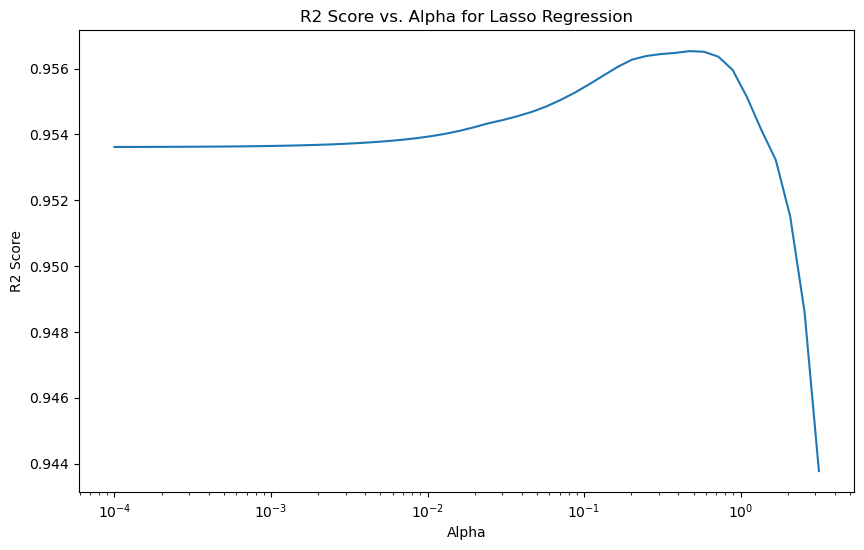

Best alpha:  {'alpha': 0.47148663634573945}
Mean absolute error:  0.5518280701742193
R2 Score:  0.9699869682761734


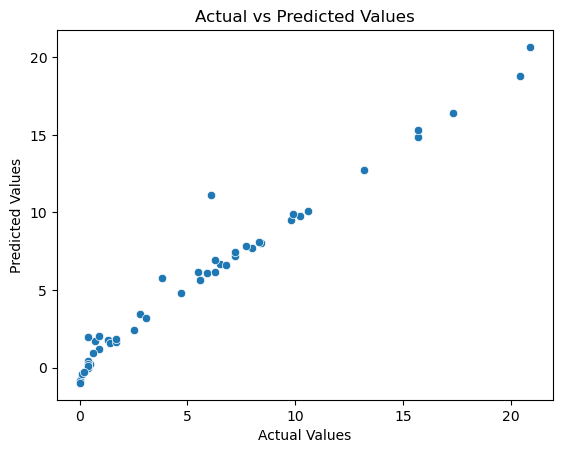

In [14]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Set up Grid Search with Cross-Validation
alpha_range = np.logspace(-4, 0.5, 50)
param_grid = {"alpha": alpha_range}
grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring="r2")

# Fit the Grid Search model
grid.fit(X_train, y_train)

# Extract the scores and plot them
mean_scores = grid.cv_results_["mean_test_score"]

# Plotting R2 Score against different hyperparameters
plt.figure(figsize=(10, 6))
sns.lineplot(x=alpha_range, y=mean_scores)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.title("R2 Score vs. Alpha for Lasso Regression")
plt.show()

# Find the best parameters
print("Best alpha: ", grid.best_params_)

# Re-fit the Lasso model with the best parameters
best_lasso = Lasso(alpha=grid.best_params_["alpha"])
best_lasso.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_lasso.predict(X_test)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_score = r2_score(y_test, y_pred)
print("Mean absolute error: ", lasso_mae)
print("R2 Score: ", lasso_score)

# Plot the results
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
ridge_mae_plain=mean_absolute_error(y_test,y_pred)
ridge_score_plain=r2_score(y_test,y_pred)
print("Mean absolute error: ", ridge_mae_plain)
print("R2 Score: ", ridge_score_plain)

Mean absolute error:  0.4248689610991273
R2 Score:  0.9885828093187996


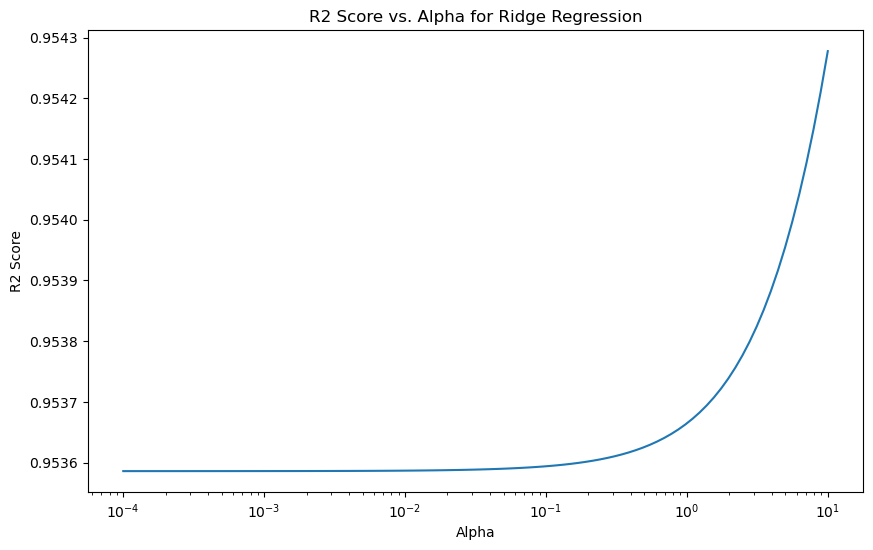

Best alpha:  {'alpha': 10.0}
Mean absolute error:  0.43705313781756994
R2 Score:  0.9876342346931206


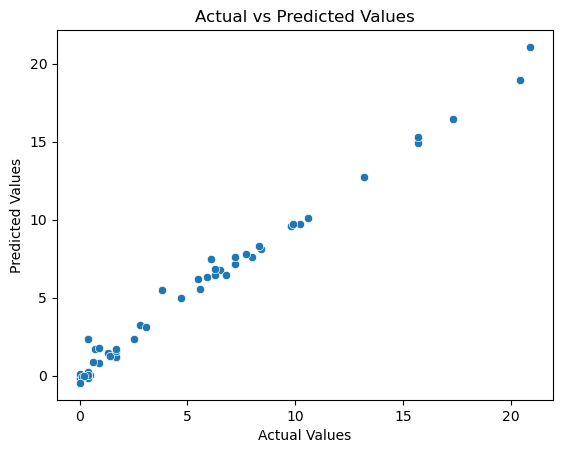

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Set up Grid Search with Cross-Validation
alpha_range = np.logspace(-4, 1, 100)  # Range for alpha
param_grid = {"alpha": alpha_range}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring="r2")

# Fit the Grid Search model
grid.fit(X_train, y_train)

# Extract the scores and plot them
mean_scores = grid.cv_results_["mean_test_score"]

# Plotting R2 Score against different hyperparameters
plt.figure(figsize=(10, 6))
sns.lineplot(x=alpha_range, y=mean_scores)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.title("R2 Score vs. Alpha for Ridge Regression")
plt.show()

# Find the best parameters
print("Best alpha: ", grid.best_params_)

# Re-fit the Ridge model with the best parameters
best_ridge = Ridge(alpha=grid.best_params_["alpha"])
best_ridge.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_ridge.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_score = r2_score(y_test, y_pred)
print("Mean absolute error: ", ridge_mae)
print("R2 Score: ", ridge_score)

# Plot the results
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

Elastic net

In [17]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)
elastic_mae_plain=mean_absolute_error(y_test,y_pred)
elastic_score_plain=r2_score(y_test,y_pred)
print("Mean absolute error: ", elastic_mae_plain)
print("R2 Score: ", elastic_score_plain)

Mean absolute error:  0.7005808033777452
R2 Score:  0.9638919834424139


Best parameters:  {'alpha': 0.7122485584859918, 'l1_ratio': 0.3684210526315789}
Mean absolute error:  0.6235565658282461
R2 Score:  0.9718403873649132


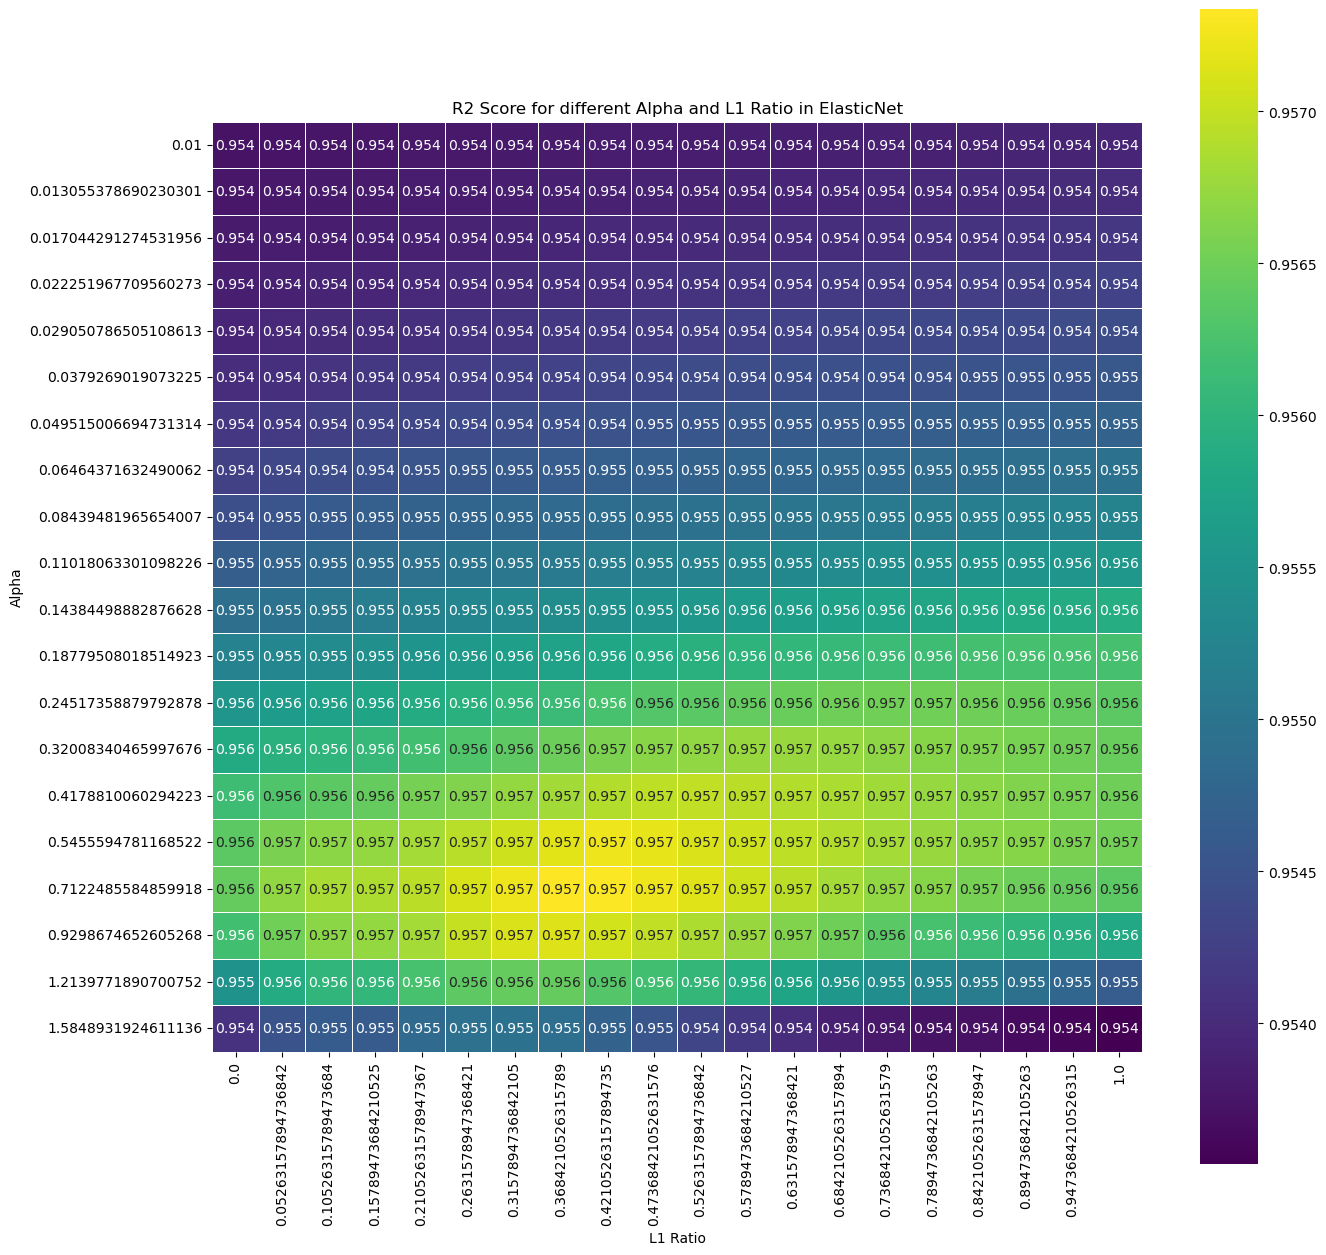

In [18]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")


# Set up Grid Search with Cross-Validation for ElasticNet
alpha_range = np.logspace(-2, 0.2, 20)  # Range for alpha
l1_ratio_range = np.linspace(0, 1, 20)  # Range for l1_ratio
param_grid = {"alpha": alpha_range, "l1_ratio": l1_ratio_range}
grid = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring="r2")

# Fit the Grid Search model
grid.fit(X_train, y_train)

# Find the best parameters
print("Best parameters: ", grid.best_params_)

# Re-fit the ElasticNet model with the best parameters
best_elastic = ElasticNet(
    alpha=grid.best_params_["alpha"], l1_ratio=grid.best_params_["l1_ratio"]
)
best_elastic.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_elastic.predict(X_test)
elastic_mae = mean_absolute_error(y_test, y_pred)
elastic_score = r2_score(y_test, y_pred)
print("Mean absolute error: ", elastic_mae)
print("R2 Score: ", elastic_score)

# Extracting results for visualization
results = pd.DataFrame(grid.cv_results_)
scores_matrix = results.pivot(
    index="param_alpha", columns="param_l1_ratio", values="mean_test_score"
)

# Plotting the results
plt.figure(figsize=(15, 15))
sns.heatmap(
    scores_matrix, annot=True, fmt=".3f", linewidths=0.5, cmap="viridis", square=True
)
plt.xlabel("L1 Ratio")
plt.ylabel("Alpha")
plt.title("R2 Score for different Alpha and L1 Ratio in ElasticNet")
plt.show()

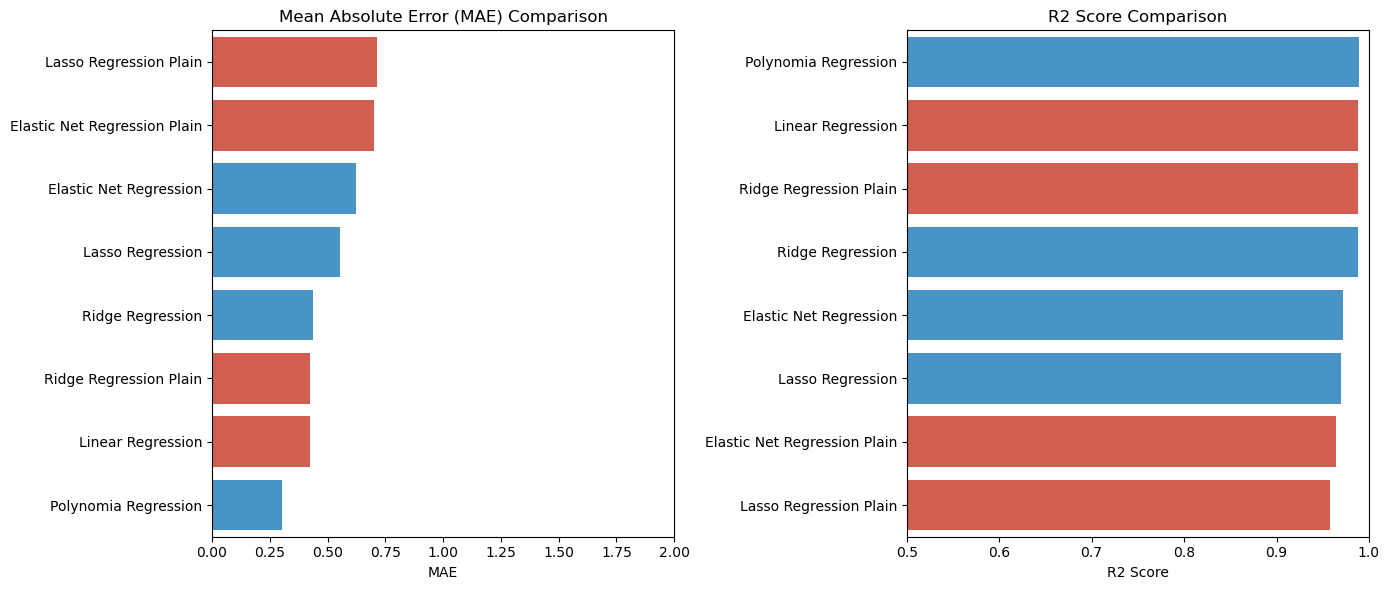

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data (replace these with your actual values)
metrics = {
    "Algorithm": [
        "Linear Regression",
        "Polynomia Regression",
        "Ridge Regression",
        "Ridge Regression Plain",
        "Lasso Regression",
        "Lasso Regression Plain",
        "Elastic Net Regression",
        "Elastic Net Regression Plain",
    ],
    "MAE": [
        lr_mae,
        mae_poly,
        ridge_mae,
        ridge_mae_plain,
        lasso_mae,
        lasso_mae_plain,
        elastic_mae,
        elastic_mae_plain,
    ],
    "R2 Score": [
        r2,
        r2_poly,
        ridge_score,
        ridge_score_plain,
        lasso_score,
        lasso_score_plain,
        elastic_score,
        elastic_score_plain,
    ],
}

# Converting to DataFrame for easier plotting
df_metrics = pd.DataFrame(metrics)

# Sorting by MAE and R2 Score in descending order
df_metrics_mae_sorted = df_metrics.sort_values(by="MAE", ascending=False)
df_metrics_r2_sorted = df_metrics.sort_values(by="R2 Score", ascending=False)

# Define color palette
palette = [
    "#3498db" if "Plain" not in alg and "Linear" not in alg else "#e74c3c"
    for alg in df_metrics_mae_sorted["Algorithm"]
]
palette2 = [
    "#3498db" if "Plain" not in alg and "Linear" not in alg else "#e74c3c"
    for alg in df_metrics_r2_sorted["Algorithm"]
]

# Plotting
plt.figure(figsize=(14, 6))

# MAE Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x="MAE", y="Algorithm", data=df_metrics_mae_sorted, palette=palette)
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xlabel("MAE")
plt.xlim([0, 2])
plt.ylabel("")

# R2 Score Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x="R2 Score", y="Algorithm", data=df_metrics_r2_sorted, palette=palette2)
plt.title("R2 Score Comparison")
plt.xlabel("R2 Score")
plt.xlim([0.5, 1])
plt.ylabel("")

plt.tight_layout()
plt.show()

From the above analysis, we can see that Polynomial Regression and Linear Regression has the lowest MAE and highest R2 scores. This means that while other regularization models might be more complex and powerful, for our current dataset, more simpler models are more apt. For testing on dataset, we can use the Polynomial Regression model for now.

Saving the Final Model using Pickle

In [26]:
# Save the best Ridge model as a pickle file
with open(r'../Models/Optimal_poly_model.pkl', 'wb') as file:
    pickle.dump(poly, file)


# To load the model later:
# with open('best_ridge_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)


Testing on Unseen Data

In [36]:
# Use the test data to evaluate the final model's performance using Polynmial Regression


X_poly_test = poly.fit_transform(X_test)
y_test_pred = poly_regressor.predict(X_poly_test)

# Final evaluation of the model on unseen data
final_mse = mae = mean_absolute_error(y_test, y_test_pred)
final_r2 = r2_score(y_test, y_test_pred)

print(f"Final Poly Regression Model - Test MSE: {final_mse}, Test R^2: {final_r2}")


Final Poly Regression Model - Test MSE: 0.3033003242648379, Test R^2: 0.9894025349859054
